In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib notebook

predicted 2459174.207461
TASTE 2459174.317617
Predicted:  2459174.207461
O-C:  0.11015600012615323


<IPython.core.display.Javascript object>


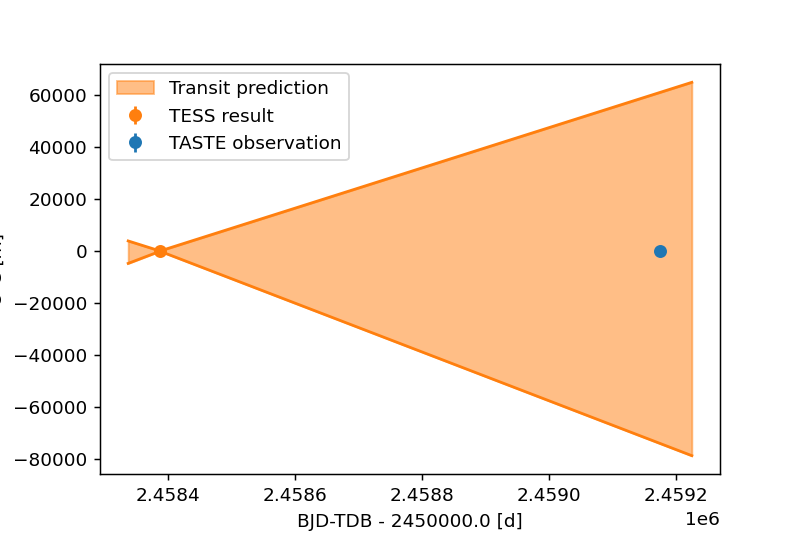

In [2]:
# Use the output values of TESS and TASTE analysis

# value, sigma_minus, sigma_plus
TASTE_Tc = [2459174.317617, 0.000566, 0.000569 ]
TESS_Tc = [2458386.572921, 0.024639, 0.024702 ]

#P = [2.468296 , 0.159518, 0.131595] # TASTE
#P = [2.423844, 2.435584e-08, 2.445850e-08] # TESS 
P = [2.44607,0.159518,0.131595] # mean value




# Linear ephemeris:
predicted = np.around((TASTE_Tc[0]-TESS_Tc[0])/P[0]) * P[0] + TESS_Tc[0]
variation = TASTE_Tc[0] - predicted

print('predicted', predicted)
print('TASTE', TASTE_Tc[0])

print('Predicted: ', predicted)
print('O-C: ', variation)


# array of times:
time_array = np.arange( min(TESS_Tc[0],TASTE_Tc[0]) - 50,  max(TESS_Tc[0],TASTE_Tc[0]) + 50, 0.1 )

# Error propagation: 
sigma_minus = (-np.abs(time_array-TESS_Tc[0])/P[0] * P[1] - TESS_Tc[1] ) * 1440.
sigma_plus  = ( np.abs(time_array-TESS_Tc[0])/P[0] * P[2] + TESS_Tc[2] ) * 1440.


plt.figure(figsize=(6,4))
plt.plot(time_array, sigma_minus, c='C1')
plt.plot(time_array, sigma_plus, c='C1')
plt.fill_between(time_array, sigma_minus, sigma_plus, color='C1', alpha=0.5, label='Transit prediction')
plt.errorbar(TESS_Tc[0], 0.00, yerr=[[TESS_Tc[1]* 1440.], [TESS_Tc[2]* 1440]], c='C1', fmt='o', label='TESS result')
plt.errorbar(TASTE_Tc[0], variation*1440, yerr=[[TASTE_Tc[1]* 1440.], [TASTE_Tc[2]* 1440.]], fmt='o', label='TASTE observation')

plt.xlabel('BJD-TDB - 2450000.0 [d]')
plt.ylabel('O-C [m]')
plt.legend()
plt.show()
#Transit prediction
